# The Species-Area Relationship of Amphibians in the Southern Appalachians

Researchers from Steele Creek Park and Northeast State Community College have compiled data from various sources to study the Species-Area Relationship (SAR) of amphibians. The SAR is a fundamental concept in ecology and biogeography that describes the relationship between the number of species present in a given area and the size of that area. The SAR is often depicted as a curve, known as the Species-Area Curve (SAC). The SAR states that as the size of a habitat or ecosystem increases, the number of species present in that area also increases, but at a decreasing rate. In other words, the more area you have, the more species you're likely to find. However, the rate of increase slows down as the area gets larger.

Here are some code examples that explore the data used in this project. First, let's import some libraries we will use in the code blocks below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data for this project into a pandas DataFrame and display the frame.

In [2]:
df = pd.read_csv('data/csv/species_area.csv')
display(df)

,Locality,Area,AmphibianSpecies,FrogSpecies,SalamanderSpecies
0,John's Bog (Blue Ridge),0.0081,10,1,9
1,Henderson Bog,0.1010,12,5,7
2,UT Arboretum,1.0100,16,9,7
3,"Sweet's Farm, Highland Co. VA",1.5700,13,5,8
4,Cantonment Area WV,3.7800,17,7,10
5,Briery Mountain WV,4.2300,14,4,10
6,Pringle Tract WV,8.5400,11,4,7
7,Harper's Ferry NHP WV,9.6500,16,6,10
8,New River SP NC,13.4500,18,7,11
9,Elk Knob SP NC,17.9000,17,4,13


Now we can create a scatter plot to visualize the amphibian data.

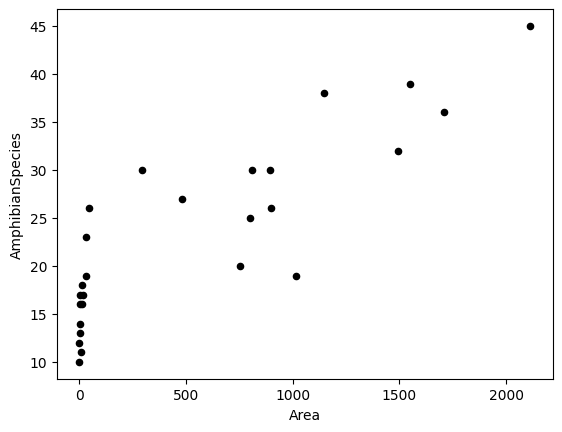

In [3]:
df.plot.scatter(x='Area', y='AmphibianSpecies', color='black')
plt.show()

To model the SAR, species richness (independent variable) and geographical area (dependent variable) samples were logarithmically (log10) transformed, and a regression analysis was performed to determine the statistical relationship between the variables. Regression modeling provided theoretical slope (z) and intercept (C) values for the formula $S= CA^z$ or in log-log form as $log(S) = log(C) + zlog(A)$ (Arrhenius 1921).

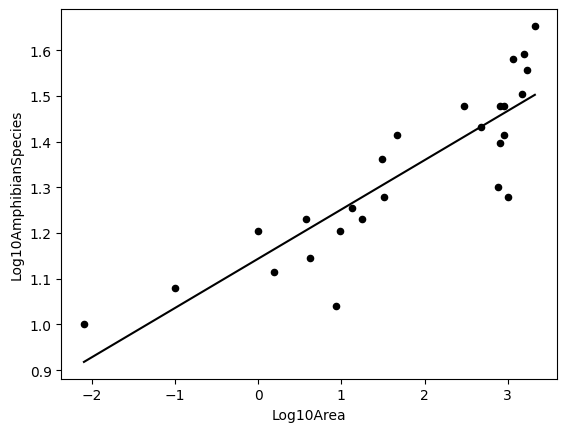

regression line: y = 0.1079x + 1.1437


In [4]:
df['Log10Area'] = np.log10(df['Area'])
df['Log10AmphibianSpecies'] = np.log10(df['AmphibianSpecies'])

# fitting a linear regression line and getting the slope and y-intercept
m_amphibians, b_amphibians = np.polyfit(df['Log10Area'], df['Log10AmphibianSpecies'], 1)

# adding the regression line to the scatter plot
fig, ax = plt.subplots()
df.plot.scatter(x='Log10Area', y='Log10AmphibianSpecies', color='black', ax=ax)
plt.plot(df['Log10Area'], m_amphibians * df['Log10Area'] + b_amphibians, color='black')
plt.show()

# Print the model derived from the regression
print(f'regression line: y = {m_amphibians:0.4f}x + {b_amphibians:0.4f}')


Calculating the regresssion allows us to fit the linear model $log(S) = log(C) + zlog(A)$, We arrive at the following model on logarithmic axes as $log(S) = 1.1437 + 0.1079 * log(A)$.

Let's create a predicitve function using these values, and plot the graph, which is just the regression line from the previous scatter plot.

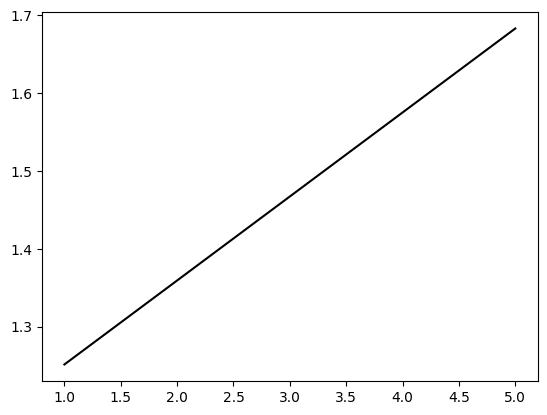

Calculating estimated species for 100km^2
Species: 22.8823171157501


In [9]:
def amphibians(log_area):
    return 0.1079 * log_area + 1.1437

areas = np.linspace(1.0, 5.0, num = 100, endpoint=True)

amphibian_species = [ amphibians(i) for i in areas ]

plt.plot(areas,amphibian_species, color='black')
plt.show()

# Let's make an estimate for 100km^2
print("Calculating estimated species for 100km^2")

# convert area to log10
log_area = np.log10(100)

# calculate log species
amphibian_species = amphibians(log_area)

# caculate species
amphibian_species = 10 ** amphibian_species

print(f'Species: {amphibian_species}')

Given the previous model we can show $S= CA^z$ as $S =13.9219A ^ {0.1079} $. Let's plot this function on arithmetic axes.

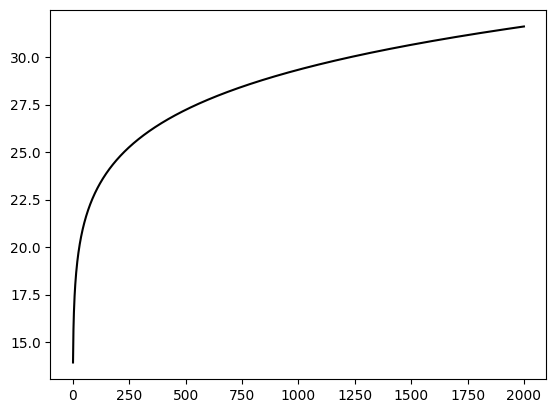

Calculating estimated species for 100km^2
Species: 22.88223860636563


In [10]:
def amphibians(area):
    return 13.9219 *area ** 0.1079

areas = np.linspace(1.0, 2000.0, num = 2000, endpoint=True)

amphibian_species = [ amphibians(i) for i in areas ]

plt.plot(areas,amphibian_species, color='black')
plt.show()

# Let's make an estimate for 100km^2
print("Calculating estimated species for 100km^2")

# calculate log species
amphibian_species = amphibians(100)

print(f'Species: {amphibian_species}')

Our dataset breaks out AmphibianSpecies into Frogs and Salamanders, so we can calculate SAR models for each, and plot them alongside the curve for all Amphibians.

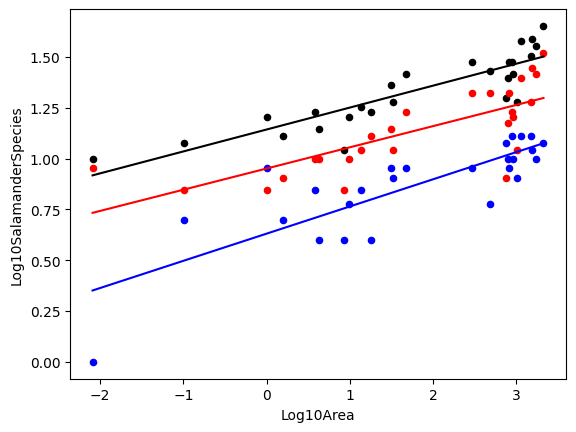

amphibian regression line: y = 0.1079x + 1.1437
frog regression line: y = 0.1338x + 0.6313
salamander regression line: y = 0.1043x + 0.9517


In [7]:
df['Log10Area'] = np.log10(df['Area'])
df['Log10AmphibianSpecies'] = np.log10(df['AmphibianSpecies'])
df['Log10FrogSpecies'] = np.log10(df['FrogSpecies'])
df['Log10SalamanderSpecies'] = np.log10(df['SalamanderSpecies'])

# fitting a linear regression line and getting the slope and y-intercept
m_amphibians, b_amphibians = np.polyfit(df['Log10Area'], df['Log10AmphibianSpecies'], 1)
m_frogs, b_frogs = np.polyfit(df['Log10Area'], df['Log10FrogSpecies'], 1)
m_salamanders, b_salamanders = np.polyfit(df['Log10Area'], df['Log10SalamanderSpecies'], 1)

# adding the regression line to the scatter plot
fig, ax = plt.subplots()
df.plot.scatter(x='Log10Area', y='Log10AmphibianSpecies', color='black', ax=ax)
df.plot.scatter(x='Log10Area', y='Log10FrogSpecies', color='blue', ax=ax)
df.plot.scatter(x='Log10Area', y='Log10SalamanderSpecies', color='red', ax=ax)
plt.plot(df['Log10Area'], m_amphibians * df['Log10Area'] + b_amphibians, color='black')
plt.plot(df['Log10Area'], m_frogs * df['Log10Area'] + b_frogs, color='blue')
plt.plot(df['Log10Area'], m_salamanders * df['Log10Area'] + b_salamanders, color='red')
plt.show()

# Print the model derived from the regression
print(f'amphibian regression line: y = {m_amphibians:0.4f}x + {b_amphibians:0.4f}')
print(f'frog regression line: y = {m_frogs:0.4f}x + {b_frogs:0.4f}')
print(f'salamander regression line: y = {m_salamanders:0.4f}x + {b_salamanders:0.4f}')

Given the regression lines we can caculate the C and z values for $S= CA^z$


|Group|C|z|
|---|---|---|
|Amphibians|13.9219|0.1079|
|Frogs|4.2785|0.1338|
|Salamanders|8.9474|0.1043|

Let's plot the SAR for each group in arithmetic space.

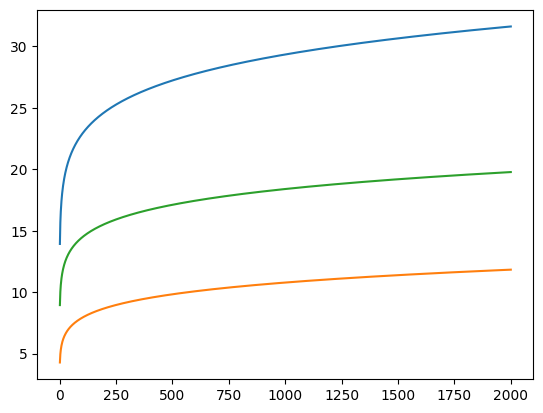

Calculating estimated species for 100km^2
Amphibians: 22.88223860636563
Frogs: 7.923034304905948
Salamanders: 14.464281096658418


In [8]:
def amphibians(area):
    return 13.9219 * area ** 0.1079

def frogs(area):
    return 4.2785 * area ** 0.1338

def salamanders(area):
    return 8.9474 * area ** 0.1043

areas = np.linspace(1.0, 2000.0, num = 2000, endpoint=True)

amphibian_species = [ amphibians(i) for i in areas ]
frogs_species = [frogs(i) for i in areas ]
salamander_species = [salamanders(i) for i in areas ]

plt.plot(areas,amphibian_species)
plt.plot(areas,frogs_species)
plt.plot(areas,salamander_species)
plt.show()

# Let's make an estimate for 100km^2
print("Calculating estimated species for 100km^2")

# calculate log species
amphibian_species = amphibians(100)
frog_species = frogs(100)
salamander_species = salamanders(100)

print(f'Amphibians: {amphibian_species}')
print(f'Frogs: {frog_species}')
print(f'Salamanders: {salamander_species}')